# Analyses des sentiments 

## Prérequis

In [ ]:
# Chargement des packages
#pip install wordcloud
#!pip install tweepy
#!pip install textblob
#pip install plotly
#pip install skimpy
#pip install flair 
#pip install --upgrade nbformat
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob 
import numpy as np
import plotly.graph_objects as go
from skimpy import skim

## Description des données

In [2]:
# Importation de la base de données (disponibles sur kaggle)


df=pd.read_csv("vaccination_tweets.csv")
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11020  │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 16     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │  0 │    0 │ -8865000 │ 12480000 │ -2146000 │ -1097000 │ -9030000 │ 10750000 │ 21450000 │ ▇▇▇▇▇▇ │  │
│ │          │    │      │          │       00 │      000 │      000 │          │       00 │       00 │        │  │
│ │ user_fol │  0 │    0 │    35190 │   294300 │        0 │      111 │      479 │     2171 │ 13710000 │   ▇    │  │
│ │ lowers   │    │      │          │          │          │          │          │          │          │        │  │
│ │ user_fri │  0 │    0 │     1170 │     2798 │        0 │      164 │      460 │     1221 │   103200 │   ▇    │  │
│ │ ends     │    │      │          │          │          │          │          │          │          │        │  │
│ │ user_fav │  0 │    0 │    15330 │    49440 │        0 │      436 │     2324 │    11140 │  1214000 │   ▇    │  │
│ │ ourites  │    │      │          │          │          │          │          │          │          │        │  │
│ │ retweets │  0 │    0 │     1.36 │    11.36 │        0 │        0 │        0 │        1 │      678 │   ▇    │  │
│ │ favorite │  0 │    0 │    7.511 │    51.19 │        0 │        0 │        1 │        4 │     2315 │   ▇    │  │
│ │ s        │    │      │          │          │          │          │          │          │          │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                            ┃ true           ┃ true rate                   ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ user_verified                          │            936 │                       0.085 │       ▇    ▁       │  │
│ │ is_retweet                             │              0 │                           0 │           ▇        │  │
│ └────────────────────────────────────────┴────────────────┴─────────────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━

In [3]:
#Visualisation des données manquantes 
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [4]:
#On s'interesse au text et la date pour voir comment les sentiments ont évolué avec le temps 
df = df[['text','date']]
df

,text,date
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19
...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...",2021-11-17 11:27:49
11016,First dose ✅\n#PfizerBioNTech,2021-11-17 03:17:44
11017,"The number of Covid-19 cases today, 16 Novembe...",2021-11-16 12:14:00
11018,#PfizerBioNTech has developed new pill #Paxlov...,2021-11-15 20:29:42


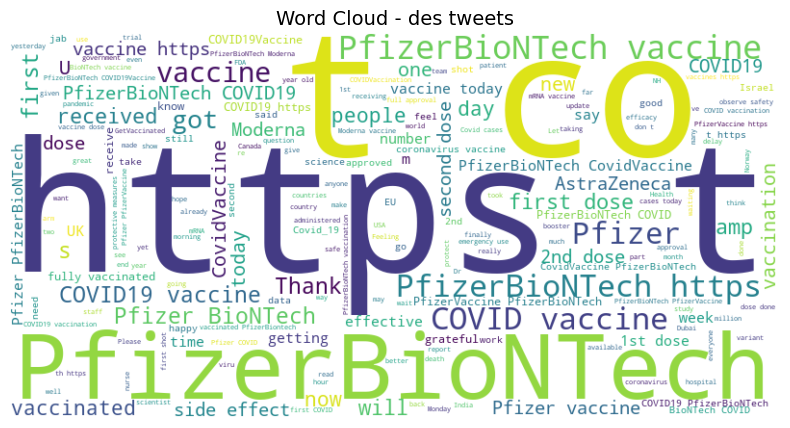

In [5]:

# Fonction pour générer le word cloud pour voir les mots qui apparaissennt souvent 
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

# Générer le word cloud 
generer_wordcloud(df['text'], 'Word Cloud - des tweets')


**Remarques:** On remarque bien l'apparition de https, la pemière étape est de nettoyer le text avant de l'utiliser 

# Prétraitement des tweets




Supposons que nous ayons la phrase suivante :

> "Les chiens courent dans le parc."

Lorsque nous appliquons la lemmatisation à cette phrase, nous obtenons :

> "Le chien courir dans le parc."

**La lemmatisation** a ramené les mots à leur forme de base (lemme), en transformant "chiens" en "chien" et "courent" en "courir". Cette normalisation permet de regrouper les variantes d'un mot autour d'une seule forme canonique.

**La lemmatisation** est un processus essentiel dans le traitement automatique du langage naturel (TALN), car elle améliore la précision des analyses textuelles, des recherches d'informations et des tâches de classification.

Utiliser **la lemmatisation** aide à réduire la complexité des données textuelles en transformant les mots en leur forme canonique, ce qui facilite la comparaison, la recherche et l'analyse du texte de manière plus précise.



In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

def clean_text(text):
    # Suppression des caractères spéciaux et de la ponctuation
    processed_tweet = re.sub(r"[^\w\s]", "", text)
    
    # Conversion en minuscules
    processed_tweet = processed_tweet.lower()
    
    # Tokenisation du texte
    tokens = word_tokenize(processed_tweet)
    
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatisation des tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Joindre les tokens en une seule chaîne
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text
# La Lemmatisation


# Appliquer le nettoyage du texte sur la colonne 'texte'
df['texte_nettoye'] = df['text'].apply(clean_text)

df


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khodj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,date,texte_nettoye
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,folk said daikon paste could treat cytokine st...
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13,world wrong side history year hopefully bigges...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,fact immutable senator even youre ethically st...
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,explain need vaccine borisjohnson matthancock ...
...,...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...",2021-11-17 11:27:49,number covid19 case today 17 november 2021 rem...
11016,First dose ✅\n#PfizerBioNTech,2021-11-17 03:17:44,first dose pfizerbiontech
11017,"The number of Covid-19 cases today, 16 Novembe...",2021-11-16 12:14:00,number covid19 case today 16 november 2021 rem...
11018,#PfizerBioNTech has developed new pill #Paxlov...,2021-11-15 20:29:42,pfizerbiontech developed new pill paxlovid inc...


Les mots stop_word qu'on a retiré 

In [16]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

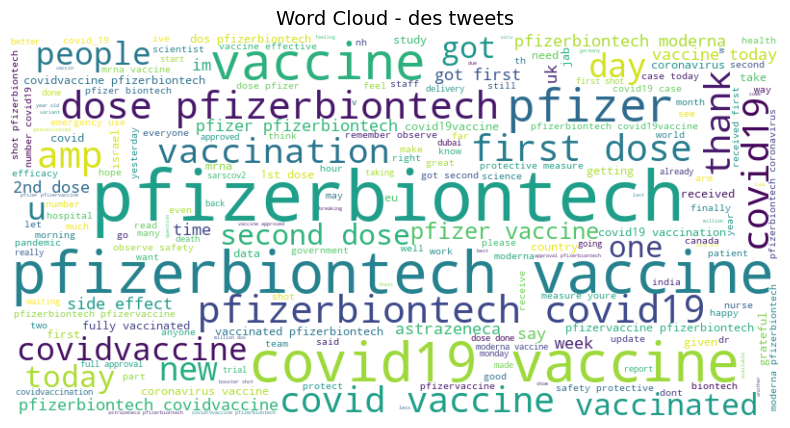

In [7]:

# Générer le word cloud 
generer_wordcloud(df['texte_nettoye'], 'Word Cloud - des tweets')


Le préttraitement est terminé!

# Analyse des sentiments

- On va utiliser le package python Textblob qui nous permet de détecter le sentiment global d'une classe 

In [8]:
example1=TextBlob("I am happy to have completed the #100JoursDeML")
print(example1.sentiment)

Sentiment(polarity=0.8, subjectivity=1.0)


In [9]:
example2=TextBlob("This situation makes me sad and frustrated.")
print(example2.sentiment)

Sentiment(polarity=-0.6, subjectivity=0.6)


In [10]:
example3=TextBlob("Tomorrow is the end of the challenge.")
print(example3.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


- **Textblob fonctionne seulement sur les phrases en anglais, mais il existe un autre package (flair) qui fonctionne sur les phrases en francais** 

In [11]:
from flair.models import TextClassifier
from flair.data import Sentence

texte = "Je suis contente d'avoir réalisé le challenge #100JoursDeML"

classifier = TextClassifier.load("sentiment")
sentence = Sentence(texte)

classifier.predict(sentence)

polarite = sentence.labels[0].score
label = sentence.labels[0].value

print("Polarité du sentiment :", polarite)
print("Étiquette du sentiment :", label)

2025-02-22 12:11:47,613 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to C:\Users\khodj\AppData\Local\Temp\tmpd2l9a_h9


100%|██████████| 253M/253M [04:09<00:00, 1.07MB/s]   

2025-02-22 12:15:56,821 copying C:\Users\khodj\AppData\Local\Temp\tmpd2l9a_h9 to cache at C:\Users\khodj\.flair\models\sentiment-en-mix-distillbert_4.pt


2025-02-22 12:15:57,075 removing temp file C:\Users\khodj\AppData\Local\Temp\tmpd2l9a_h9


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Polarité du sentiment : 0.9991108775138855
Étiquette du sentiment : POSITIVE


In [12]:
# Calcule de la polarité
df['polarity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['texte_nettoye'].apply(lambda x: TextBlob(x).sentiment[1])
# Définir les étiquettes de sentiment en fonction de la polarité
df['Sentiment'] = df['polarity'].apply(lambda x: 'Positif' if x > 0 else ('Négatif' if x < 0 else 'Neutre'))
df

,text,date,texte_nettoye,polarity,subjectivity,Sentiment
0,Same folks said daikon paste could treat a cyt...,2020-12-20 06:06:44,folk said daikon paste could treat cytokine st...,0.000000,0.000000,Neutre
1,While the world has been on the wrong side of ...,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,-0.500000,0.900000,Négatif
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000000,0.033333,Neutre
3,"Facts are immutable, Senator, even when you're...",2020-12-12 20:23:59,fact immutable senator even youre ethically st...,0.100000,0.550000,Positif
4,Explain to me again why we need a vaccine @Bor...,2020-12-12 20:17:19,explain need vaccine borisjohnson matthancock ...,0.000000,0.000000,Neutre
...,...,...,...,...,...,...
11015,"The number of Covid-19 cases today, 17 Novembe...",2021-11-17 11:27:49,number covid19 case today 17 november 2021 rem...,0.000000,0.000000,Neutre
11016,First dose ✅\n#PfizerBioNTech,2021-11-17 03:17:44,first dose pfizerbiontech,0.250000,0.333333,Positif
11017,"The number of Covid-19 cases today, 16 Novembe...",2021-11-16 12:14:00,number covid19 case today 16 november 2021 rem...,0.000000,0.000000,Neutre
11018,#PfizerBioNTech has developed new pill #Paxlov...,2021-11-15 20:29:42,pfizerbiontech developed new pill paxlovid inc...,-0.121212,0.501515,Négatif


In [14]:
# Calculer les statistiques sur la polarité
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11020  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0  ┃ p25   ┃ p50   ┃ p75      ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ polarity          │    0 │      0 │   0.1006 │   0.2322 │  -1 │     0 │     0 │   0.2129 │     1 │    ▁▇▁  │  │
│ │ subjectivity      │    0 │      0 │   0.2749 │   0.3031 │   0 │     0 │   0.2 │      0.5 │     1 │ ▇▂▃▂▁▁  │  │
│ └───────────────────┴──────┴────────┴──────────┴──────────┴─────┴───────┴───────┴──────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ text                         │      0 │          0 │                          16 │                  179704 │  │
│ │ date                         │      0 │          0 │                           2 │                   22040 │  │
│ │ texte_nettoye                │      0 │          0 │                          11 │                  120428 │  │
│ │ Sentiment                    │      0 │          0 │                           1 │                   11020 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

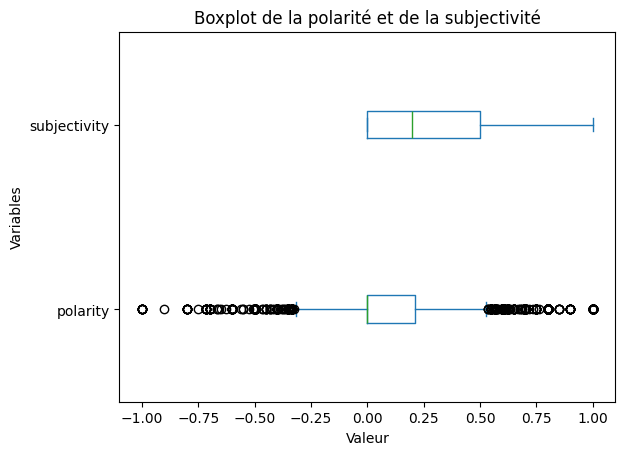

In [15]:
# Tracer le boxplot pour la polarité et la subjectivité
df[['polarity', 'subjectivity']].plot(kind='box', vert=False)

# Ajouter des titres et des étiquettes d'axe
plt.title('Boxplot de la polarité et de la subjectivité')
plt.xlabel('Valeur')
plt.ylabel('Variables')

# Afficher le boxplot
plt.show()

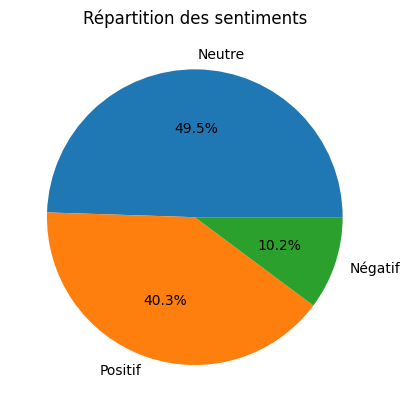

In [16]:
# Compter le nombre de chaque sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Obtenir les étiquettes de sentiment et les valeurs correspondantes
labels = sentiment_counts.index.tolist()
values = sentiment_counts.values.tolist()

# Tracer le diagramme circulaire
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Ajouter un titre
plt.title("Répartition des sentiments")

# Afficher le diagramme circulaire
plt.show()

In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


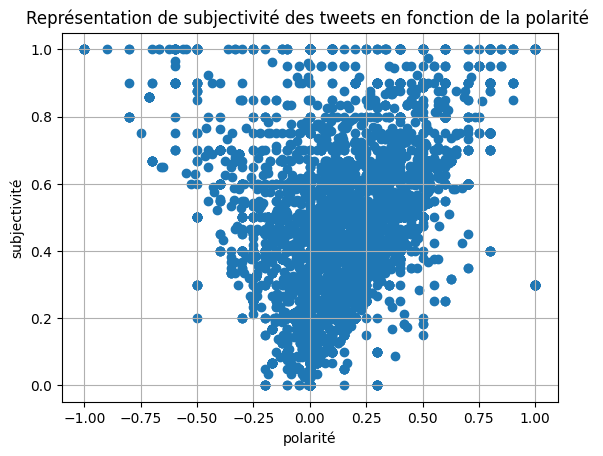

In [21]:
plt.scatter(df['polarity'],df['subjectivity'])
plt.title("Représentation de subjectivité des tweets en fonction de la polarité ")
plt.xlabel("polarité")
plt.ylabel("subjectivité")
plt.grid()

Text(0.5, 1.0, 'Evolution de la polarité au fil du temmps')

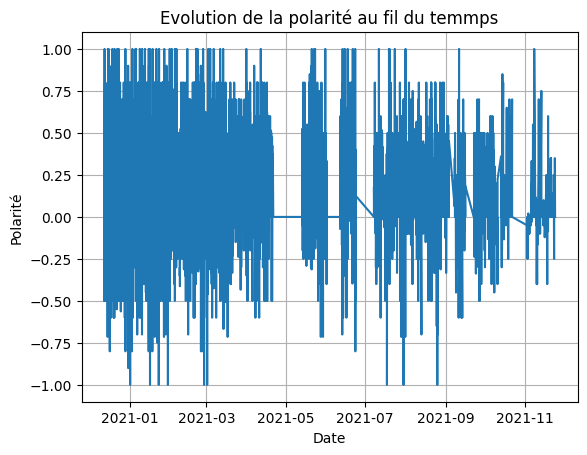

In [33]:
# Convertir la colonne 'Date' en type de données 'datetime'
df['date'] = pd.to_datetime(df['date'])

# Trier le DataFrame par ordre croissant de dates
df = df.sort_values('date')

plt.figure()
plt.plot(df['date'], df['polarity'] , label = "Polarité")
plt.xlabel('Date')
plt.ylabel('Polarité')
plt.grid()
plt.title("Evolution de la polarité au fil du temmps")


**On voit bien qu'avec le temps les avis deviennent de plus en plus positives**

In [34]:
import plotly.express as px
# Convertir la colonne 'date' en type datetime
df['date'] = pd.to_datetime(df['date'])

# Enlever les heures de la date
df['date'] = df['date'].dt.date
# Calculer le nombre de tweets par sentiment et par date
df_agg = df.groupby(['date', 'Sentiment']).size().reset_index(name='counts')

df_agg.head()

,date,Sentiment,counts
0,2020-12-12,Neutre,34
1,2020-12-12,Négatif,7
2,2020-12-12,Positif,22
3,2020-12-13,Neutre,50
4,2020-12-13,Négatif,10


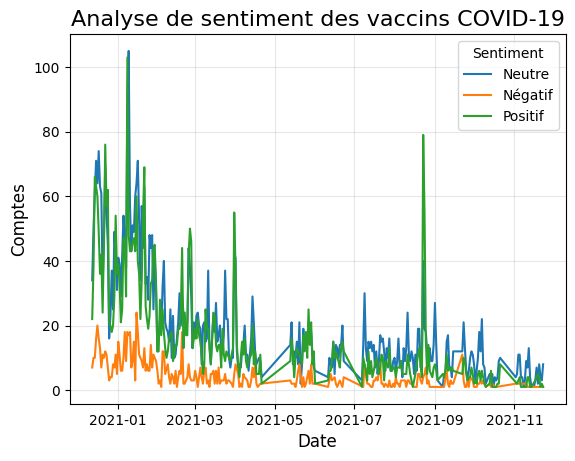

In [37]:
for sentiment in df_agg['Sentiment'].unique():
    subset = df_agg[df_agg['Sentiment'] == sentiment]
    plt.plot(subset['date'], subset['counts'], label=sentiment)

# Ajouter un titre et des étiquettes d'axe
plt.title('Analyse de sentiment des vaccins COVID-19', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Comptes', fontsize=12)

# Ajouter une légende pour distinguer les sentiments
plt.legend(title='Sentiment', fontsize=10)

# Ajouter une grille pour une meilleure lisibilité
plt.grid(alpha=0.3)

# Afficher le graphique
plt.show()

In [38]:

# Grouper par date et compter le nombre de sentiments positifs, négatifs et neutres
sentiment_counts = df.groupby('date')['Sentiment'].value_counts().unstack().fillna(0)

# Afficher le résultat
print(sentiment_counts)

Sentiment   Neutre  Négatif  Positif
date                                
2020-12-12    34.0      7.0     22.0
2020-12-13    50.0     10.0     38.0
2020-12-14    61.0     10.0     66.0
2020-12-15    71.0     16.0     63.0
2020-12-16    64.0     20.0     60.0
...            ...      ...      ...
2021-11-19     2.0      0.0      5.0
2021-11-20     8.0      0.0      4.0
2021-11-21     4.0      0.0      1.0
2021-11-22     3.0      0.0      2.0
2021-11-23     8.0      1.0      1.0

[282 rows x 3 columns]


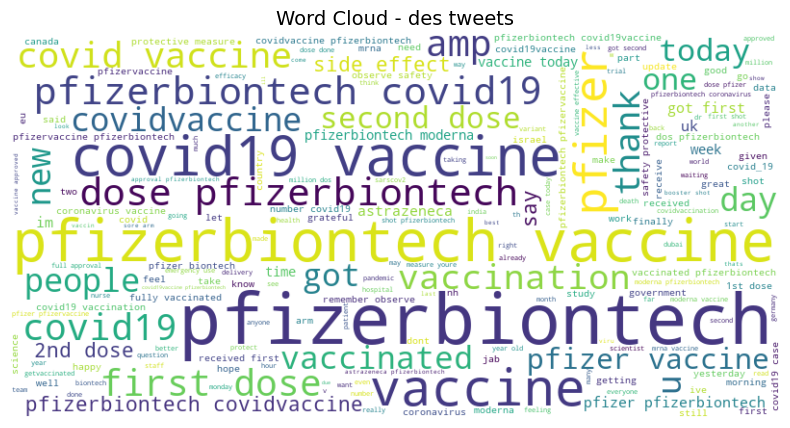

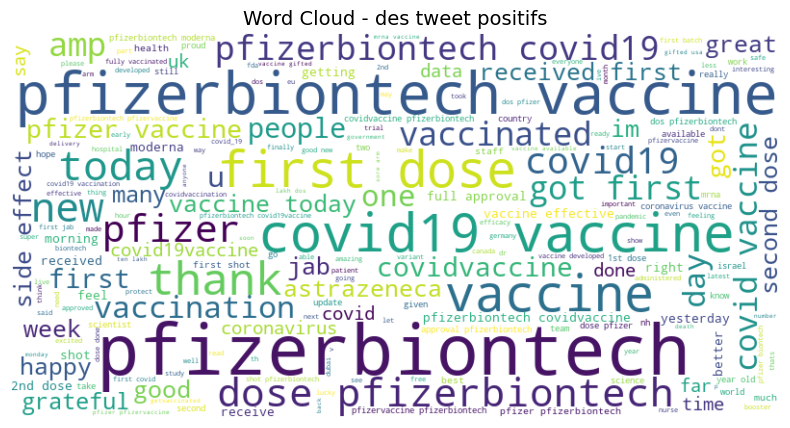

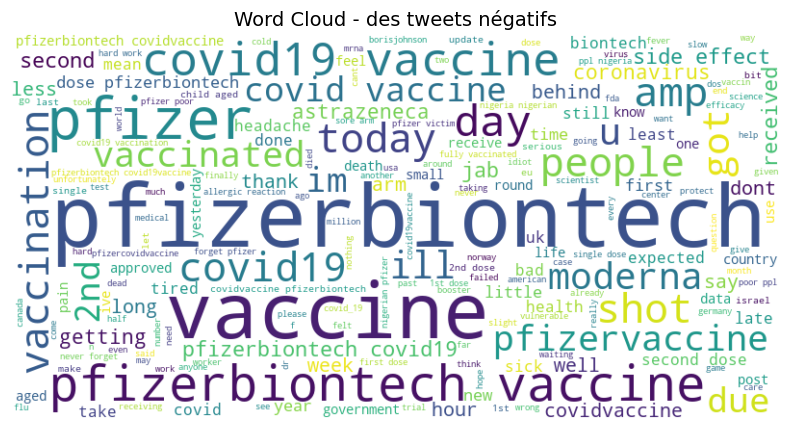

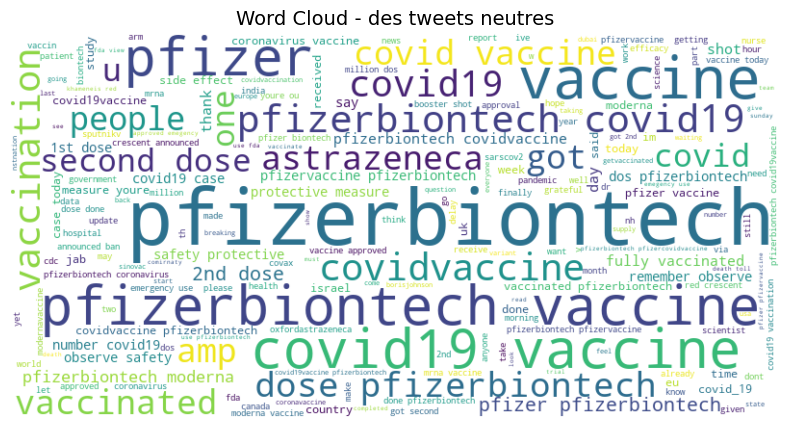

In [39]:
# Générer le word cloud pour chaque type de sentiment
generer_wordcloud(df['texte_nettoye'], 'Word Cloud - des tweets')
# Filtrer les tweets positifs
tweets_positifs = df[df['polarity']>0]['texte_nettoye']
generer_wordcloud(tweets_positifs, 'Word Cloud - des tweet positifs')
# Filtrer les tweets positifs
tweets_negatifs = df[df['polarity'] < 0]['texte_nettoye']
generer_wordcloud(tweets_negatifs, 'Word Cloud - des tweets négatifs')
# Filtrer les tweets positifs
tweets_neutre = df[df['polarity'] ==0]['texte_nettoye']
generer_wordcloud(tweets_neutre, 'Word Cloud - des tweets neutres')

In [40]:
# Breaking down the tweets into words in seperate categories
positive_tokens = [token for line in tweets_positifs for token in line.split()]
negative_tokens = [token for line in tweets_negatifs for token in line.split()]
neutral_tokens = [token for line in tweets_neutre for token in line.split()]

In [47]:
from collections import Counter
# pour obtenir les mots les plus utilisés
def get_maxtoken(tweets, num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])

  plt.figure()
  # Tracer le diagramme en barres
  plt.bar(df['words'], df['count'])

  # Ajouter un titre et des étiquettes d'axe
  plt.title(title, fontsize=16)  # Utiliser la variable 'title' pour le titre
  plt.xlabel('Mots', fontsize=12)  # Étiquette pour l'axe x
  plt.ylabel('Compte', fontsize=12)  # Étiquette pour l'axe y

  # Ajouter une grille pour une meilleure lisibilité (optionnel)
  plt.grid(axis='y', alpha=0.3)

  # Faire pivoter les étiquettes de l'axe x si nécessaire (par exemple, si elles sont trop longues)
  plt.xticks(rotation=45, ha='right')

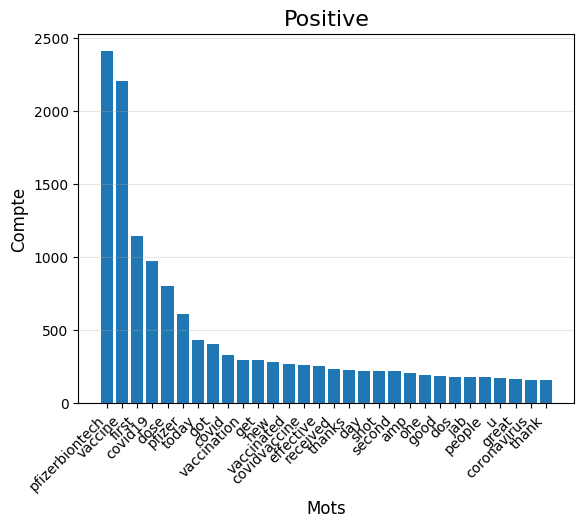

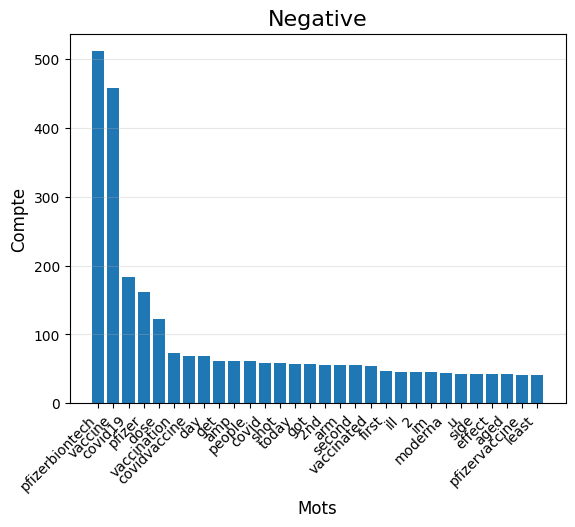

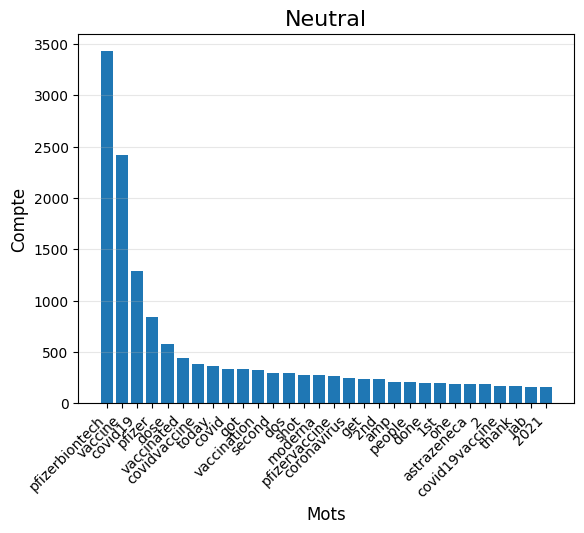

In [48]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')

# Analyse par type de vaccin

In [49]:
#Création des tags de référence pour 5 vaccins -> Pfizer, Covaxin (Bharat Biotech), Sputnik, AstraZenca (Covishield), Moderna.
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']


In [50]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

df['pfizer'] = df['texte_nettoye'].apply(lambda x : refer(x, pfizer_refs))
df['bbiotech'] = df['texte_nettoye'].apply(lambda x : refer(x, bbiotech_refs))
df['sputnik'] = df['texte_nettoye'].apply(lambda x : refer(x, sputnik_refs))
df['astra'] = df['texte_nettoye'].apply(lambda x : refer(x, astra_refs))
df['moderna'] = df['texte_nettoye'].apply(lambda x : refer(x, moderna_refs))
df

,text,date,texte_nettoye,polarity,subjectivity,Sentiment,pfizer,bbiotech,sputnik,astra,moderna
44,#FDA authorizes #PfizerBioNTech #coronavirus v...,2020-12-12,fda authorizes pfizerbiontech coronavirus vacc...,0.000000,0.000000,Neutre,1,0,0,0,0
43,Trump announces #vaccine rollout 'in less than...,2020-12-12,trump announces vaccine rollout less 24 hour f...,0.027778,0.133333,Positif,0,0,0,0,0
42,#CovidVaccine #Pfizer-BioNTech COVID-19 #Pfize...,2020-12-12,covidvaccine pfizerbiontech covid19 pfizerbion...,0.000000,0.000000,Neutre,1,0,0,0,0
41,FACT SHEET FOR RECIPIENTS AND CAREGIVERS\n\n#P...,2020-12-12,fact sheet recipient caregiver pfizerbiontech ...,0.000000,0.000000,Neutre,1,0,0,0,0
40,@mirekR9 @sputnikvaccine @AstraZeneca it's the...,2020-12-12,mirekr9 sputnikvaccine astrazeneca one doesnt ...,0.000000,0.000000,Neutre,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10963,The expansion is valid for both Moderna and Pf...,2021-11-23,expansion valid moderna pfizerbiontech covid19...,0.000000,0.400000,Neutre,1,0,0,0,1
10962,#Moderna and #PfizerBioNTech \n\nFull report: ...,2021-11-23,moderna pfizerbiontech full report httpstcog6c...,0.350000,0.550000,Positif,1,0,0,0,1
10961,Nothing to see here 👀\n\n#Health #heartattack ...,2021-11-23,nothing see health heartattack myocarditis per...,0.000000,0.000000,Neutre,1,0,0,0,1
10960,#PfizerBiontech #CovidVaccines the effects #M...,2021-11-23,pfizerbiontech covidvaccines effect msm hiding...,0.000000,0.000000,Neutre,1,0,0,0,0


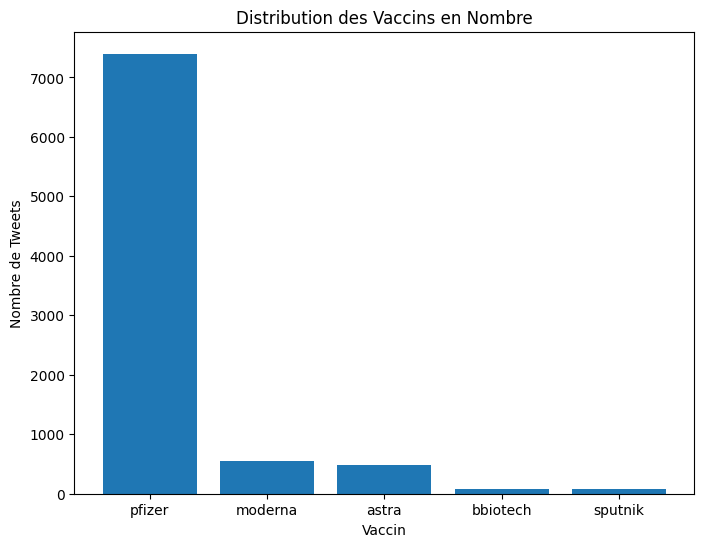

In [51]:
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'moderna', 'astra', 'bbiotech', 'sputnik']

# Calculer la distribution de chaque vaccin en nombre
vaccine_counts = df[vaccine_names].sum()

# Créer un graphique à barres pour la distribution de chaque vaccin
plt.figure(figsize=(8, 6))
plt.bar(vaccine_names, vaccine_counts)
plt.title('Distribution des Vaccins en Nombre')
plt.xlabel('Vaccin')
plt.ylabel('Nombre de Tweets')
plt.show()

In [57]:
# Initialiser un DataFrame vide pour les résultats
results_df = pd.DataFrame(columns=['Vaccin', 'Moyenne Polarity', 'Max Polarity', 'Min Polarity', 'Médiane Polarity',
                                   'Moyenne Subjectivity', 'Max Subjectivity', 'Min Subjectivity', 'Médiane Subjectivity'])
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'moderna', 'astra', 'bbiotech', 'sputnik']

# Parcourir les vaccins
for vaccine in vaccine_names:
    # Filtrer le DataFrame pour le vaccin spécifique
    filtered_df = df[df[vaccine] == 1]
    
    # Calculer les statistiques pour la polarité et la subjectivité
    polarity_stats = filtered_df['polarity'].agg(['mean', 'max', 'min', 'median'])
    subjectivity_stats = filtered_df['subjectivity'].agg(['mean', 'max', 'min', 'median'])
    
    # Ajouter les résultats au DataFrame des résultats
    results_temp = pd.DataFrame({
    'Vaccin': [vaccine],  # Encapsuler dans une liste
    'Moyenne Polarity': [polarity_stats['mean']],
    'Max Polarity': [polarity_stats['max']],
    'Min Polarity': [polarity_stats['min']],
    'Médiane Polarity': [polarity_stats['median']],
    'Moyenne Subjectivity': [subjectivity_stats['mean']],
    'Max Subjectivity': [subjectivity_stats['max']],
    'Min Subjectivity': [subjectivity_stats['min']],
    'Médiane Subjectivity': [subjectivity_stats['median']]
    })

    results_df = pd.concat([results_df, results_temp],ignore_index=True)
# Afficher le DataFrame des résultats
results_df

C:\Users\khodj\AppData\Local\Temp\ipykernel_22628\2792489398.py:29: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,Vaccin,Moyenne Polarity,Max Polarity,Min Polarity,Médiane Polarity,Moyenne Subjectivity,Max Subjectivity,Min Subjectivity,Médiane Subjectivity
0,pfizer,0.099360,1.0,-1.000000,0.0,0.252860,1.0,0.0,0.111111
1,moderna,0.094029,1.0,-0.714286,0.0,0.250713,1.0,0.0,0.000000
2,astra,0.092127,1.0,-0.700000,0.0,0.256679,1.0,0.0,0.100000
3,bbiotech,0.059863,0.8,-0.500000,0.0,0.221396,1.0,0.0,0.000000
4,sputnik,0.011118,1.0,-0.700000,0.0,0.150123,0.9,0.0,0.000000


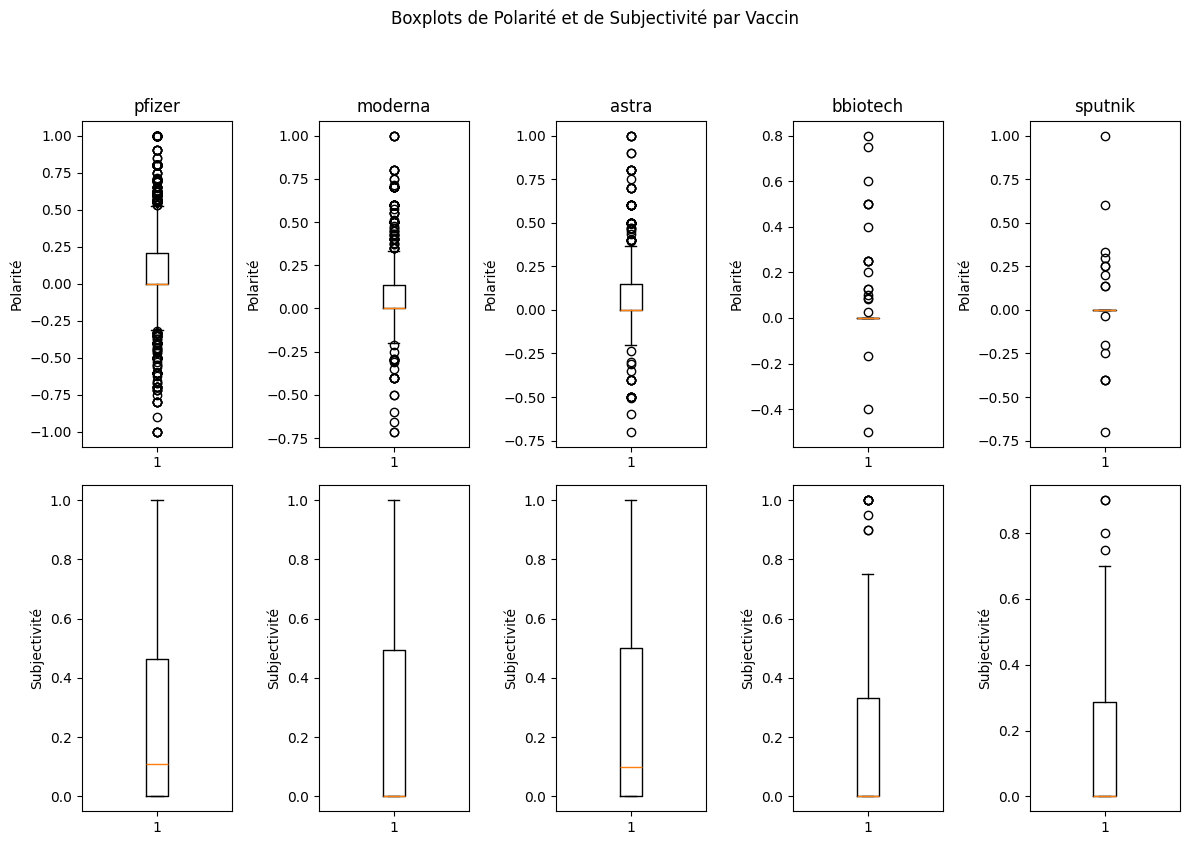

In [58]:
# Création des boxplots pour la polarité et la subjectivité pour chaque vaccin
fig, axes = plt.subplots(nrows=2, ncols=len(vaccine_names), figsize=(12, 8))

for i, vaccine in enumerate(vaccine_names):
    # Boxplot de la polarité pour le vaccin spécifique
    axes[0, i].boxplot(df[df[vaccine] == 1]['polarity'])
    axes[0, i].set_title(vaccine)
    axes[0, i].set_ylabel('Polarité')
    
    # Boxplot de la subjectivité pour le vaccin spécifique
    axes[1, i].boxplot(df[df[vaccine] == 1]['subjectivity'])
    axes[1, i].set_ylabel('Subjectivité')

# Ajouter des titres et ajuster les espacements
fig.suptitle('Boxplots de Polarité et de Subjectivité par Vaccin', y=1.05)
plt.tight_layout()

# Afficher les boxplots
plt.show()

**Essayons de voir l'ecolution de la ppolarité de chaque vaccin avec le temps**

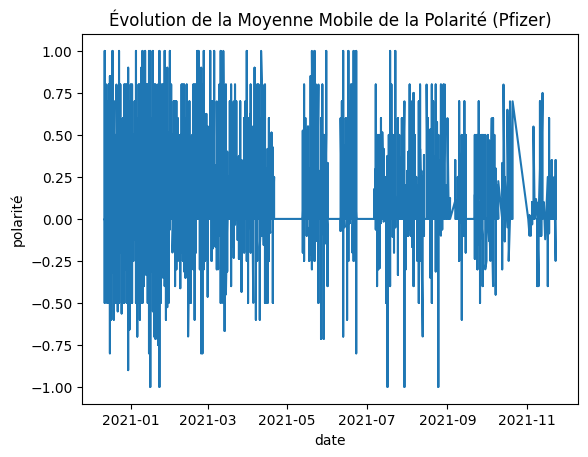

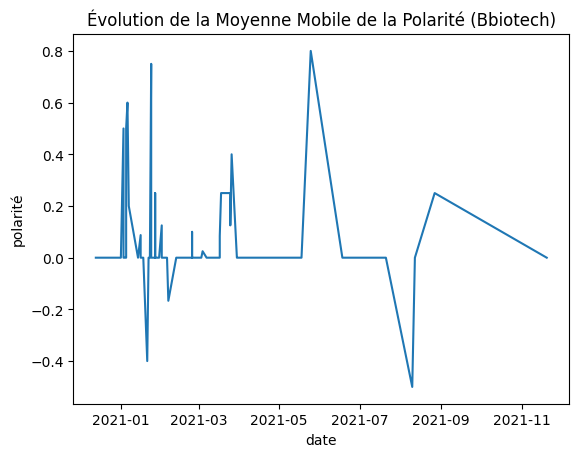

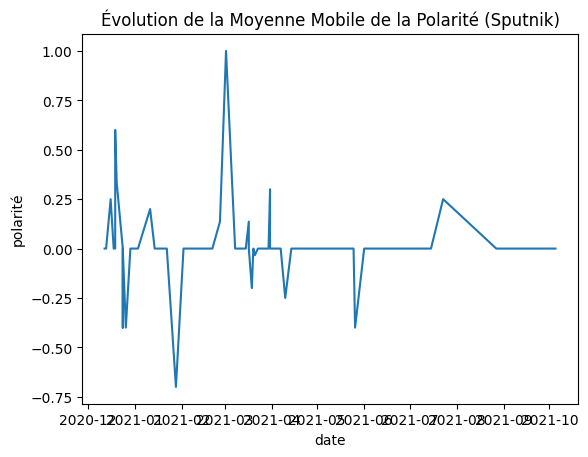

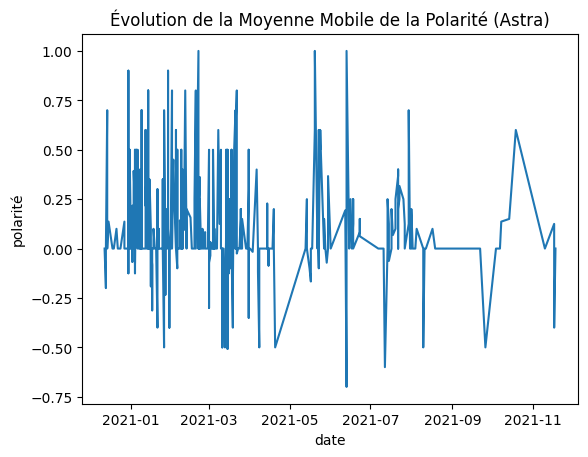

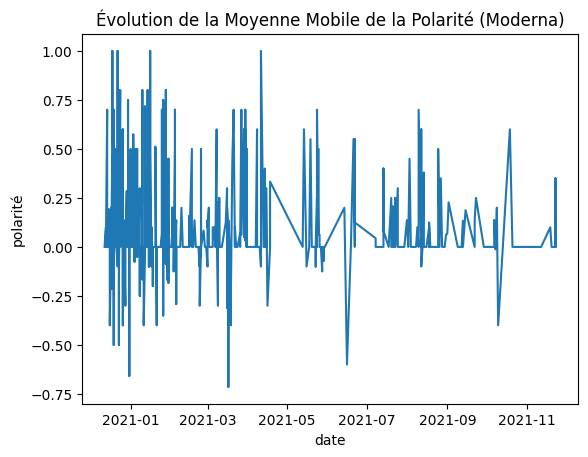

In [60]:
# Liste des noms de vaccins
vaccine_names = ['pfizer', 'bbiotech', 'sputnik', 'astra', 'moderna']

# Créer des graphiques séparés pour l'évolution de la moyenne mobile de la polarité par date pour chaque vaccin
for vaccine in vaccine_names:
    plt.figure()
    plt.plot(df[df[vaccine] == 1]['date'],df[df[vaccine] == 1]['polarity'])
    plt.title(f'Évolution de la Moyenne Mobile de la Polarité ({vaccine.capitalize()})')
    plt.xlabel("date")
    plt.ylabel("polarité")

    